In [2]:
import pandas as pd

df = pd.read_excel('STDR1000300 Inventory.xlsx')

df.head()

,Report_date,Part_no,Stock
0,2016-11-08,STDR1000300,2863
1,2016-11-25,STDR1000300,2106
2,2016-11-26,STDR1000300,1909
3,2016-12-03,STDR1000300,2074
4,2016-12-05,STDR1000300,2074


In [4]:
df['Report_date'] = pd.to_datetime(df['Report_date'])
df.set_index('Report_date', inplace=True)

df.head()

,Part_no,Stock
Report_date,,
2016-11-08,STDR1000300,2863
2016-11-25,STDR1000300,2106
2016-11-26,STDR1000300,1909
2016-12-03,STDR1000300,2074
2016-12-05,STDR1000300,2074


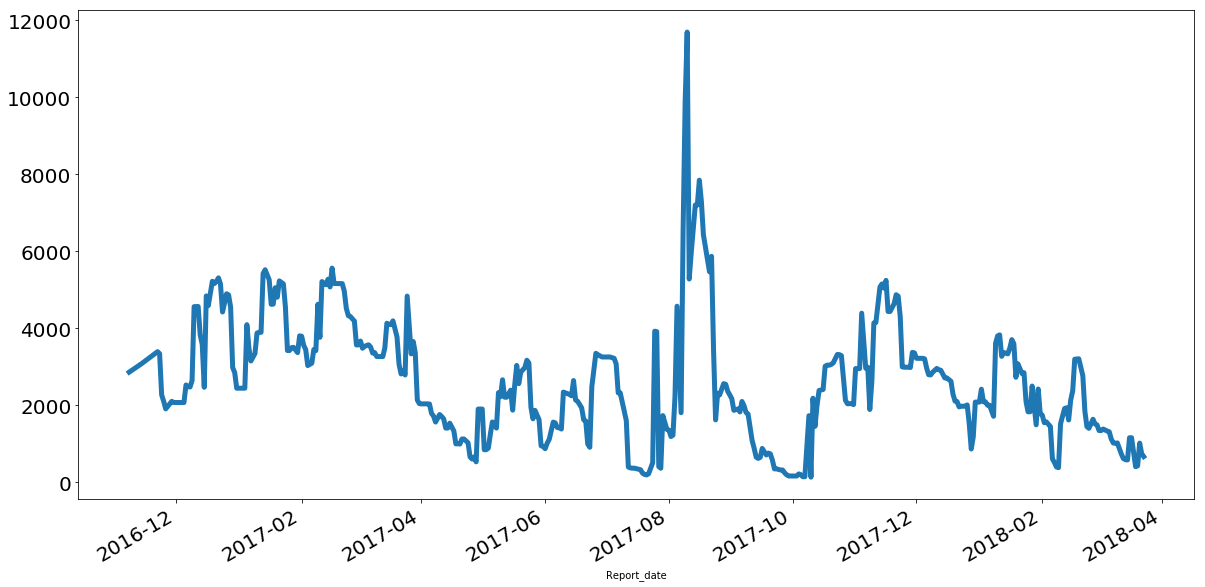

In [13]:
df['Stock'].plot(figsize=(20,10), linewidth=5, fontsize=20)

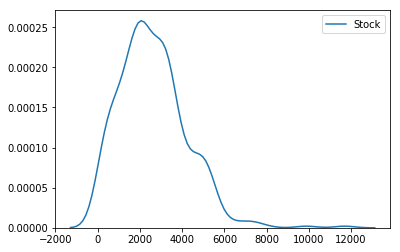

In [7]:
import seaborn as sns

sns.kdeplot(df['Stock'])

c:\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


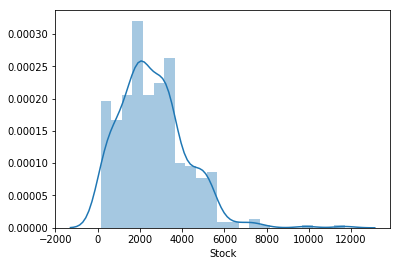

In [66]:
sns.distplot(df['Stock'])

In [8]:
df['Ticks'] = range(0,len(df.index.values))
df.head()

,Part_no,Stock,Ticks
Report_date,,,
2016-11-08,STDR1000300,2863,0
2016-11-25,STDR1000300,2106,1
2016-11-26,STDR1000300,1909,2
2016-12-03,STDR1000300,2074,3
2016-12-05,STDR1000300,2074,4


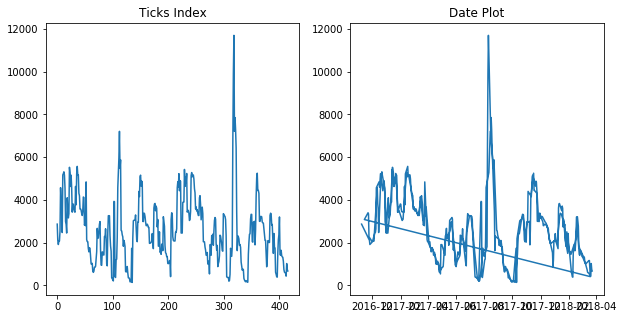

In [43]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Stock', data = df);
axes[0].set_title('Ticks Index');
axes[1].plot('Stock', data = df);
axes[1].set_title('Date Plot');

In [37]:
#SAMPLING

import numpy as np

sample_half_df = df.sample(frac = .5, random_state=np.random.randint(10))

sample_half_df.head()


,Part_no,Stock,Ticks
Report_date,,,
2017-11-01,STDR1000300,2956,353
2017-07-25,STDR1000300,3927,102
2017-06-21,STDR1000300,1597,298
2018-01-02,STDR1000300,2420,171
2017-06-23,STDR1000300,911,90


In [38]:
sample_half_df.index.name = None
sample_half_df = sample_half_df.sort_values(by=['Ticks'], ascending=[True])
sample_half_df.head()

,Part_no,Stock,Ticks
2016-11-08,STDR1000300,2863,0
2016-12-05,STDR1000300,2074,4
2016-12-06,STDR1000300,2529,5
2016-12-12,STDR1000300,4568,6
2016-12-15,STDR1000300,2469,9


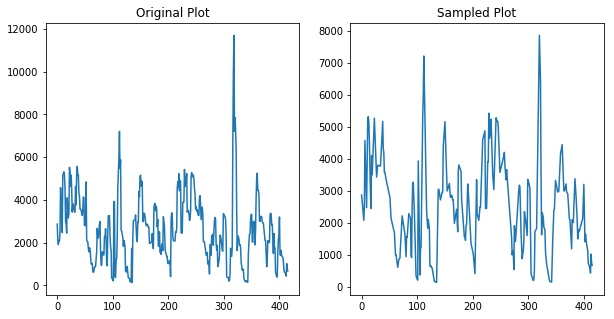

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Stock', data = df);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Stock', data = sample_half_df);
axes[1].set_title('Sampled Plot');

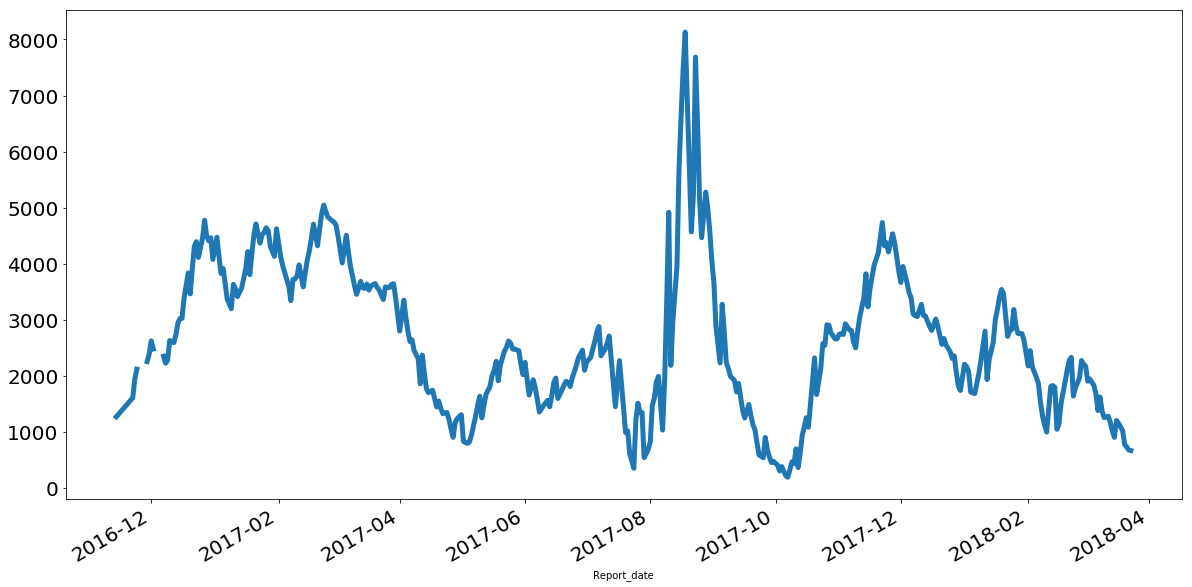

In [46]:
#ROLLING MEAN

df['Stock'].rolling(window = 7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)



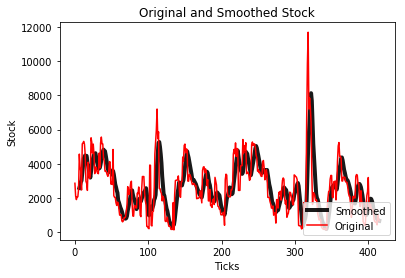

In [45]:
#SUPER IMPOSED

df['Rolling_Mean'] = df['Stock'].rolling(window = 7).mean()

fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df['Ticks'], df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(df['Ticks'], df['Stock'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Stock')
ax.set_xlabel('Ticks')
ax.set_ylabel('Stock')
ax.legend(loc='lower right');

In [48]:
sales_df = pd.read_excel('STDR1000300 Sales.xlsx')

sales_df.head()

,Report_date,PartNo,Quantity,Price
0,2016-10-18,STDR1000300,246,72.857142
1,2016-10-19,STDR1000300,8,78.000000
2,2016-10-20,STDR1000300,250,60.000000
3,2016-10-21,STDR1000300,218,78.000000
4,2016-10-26,STDR1000300,137,75.428571


In [54]:
sales_df['Report_date'] = pd.to_datetime(sales_df['Report_date'])

sales_df.set_index('Report_date', inplace = True)


KeyError: 'Report_date'

In [55]:
sales_df.head()

,PartNo,Quantity,Price
Report_date,,,
2016-10-18,STDR1000300,246,72.857142
2016-10-19,STDR1000300,8,78.000000
2016-10-20,STDR1000300,250,60.000000
2016-10-21,STDR1000300,218,78.000000
2016-10-26,STDR1000300,137,75.428571


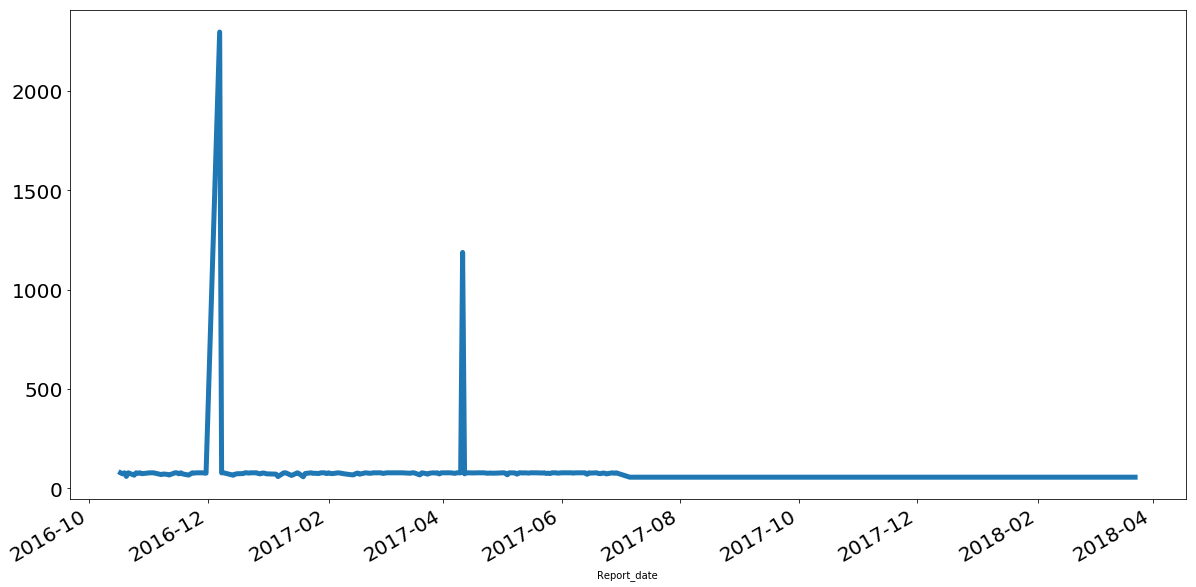

In [57]:
sales_df['Price'].plot(figsize=(20,10), linewidth=5, fontsize=20)

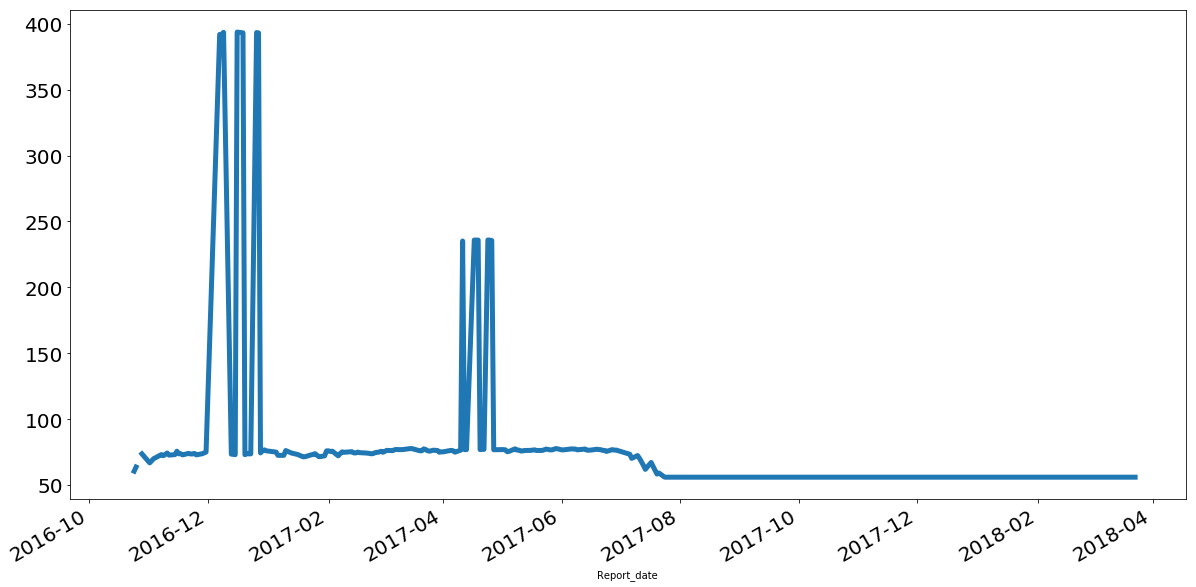

In [60]:
sales_df['Price'].rolling(window = 7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

In [61]:
#FINDING OUTLIERS

sales_df[sales_df['Price'] > 500]

#Gonna remove them

,PartNo,Quantity,Price
Report_date,,,
2016-12-07,STDR1000300,5,2295.7450
2017-04-11,STDR1000300,52,1186.8725


In [64]:
sales_df = sales_df[sales_df['Price'] < 500]

sales_df.head()

,PartNo,Quantity,Price
Report_date,,,
2016-10-18,STDR1000300,246,72.857142
2016-10-19,STDR1000300,8,78.000000
2016-10-20,STDR1000300,250,60.000000
2016-10-21,STDR1000300,218,78.000000
2016-10-26,STDR1000300,137,75.428571


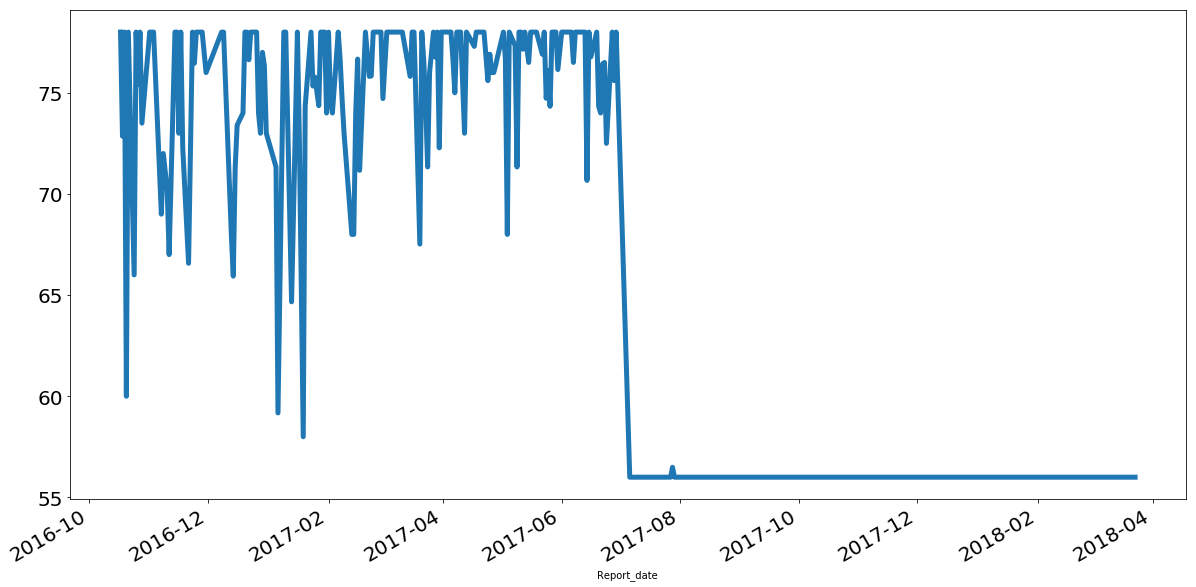

In [63]:
sales_df['Price'].plot(figsize=(20,10), linewidth=5, fontsize=20)

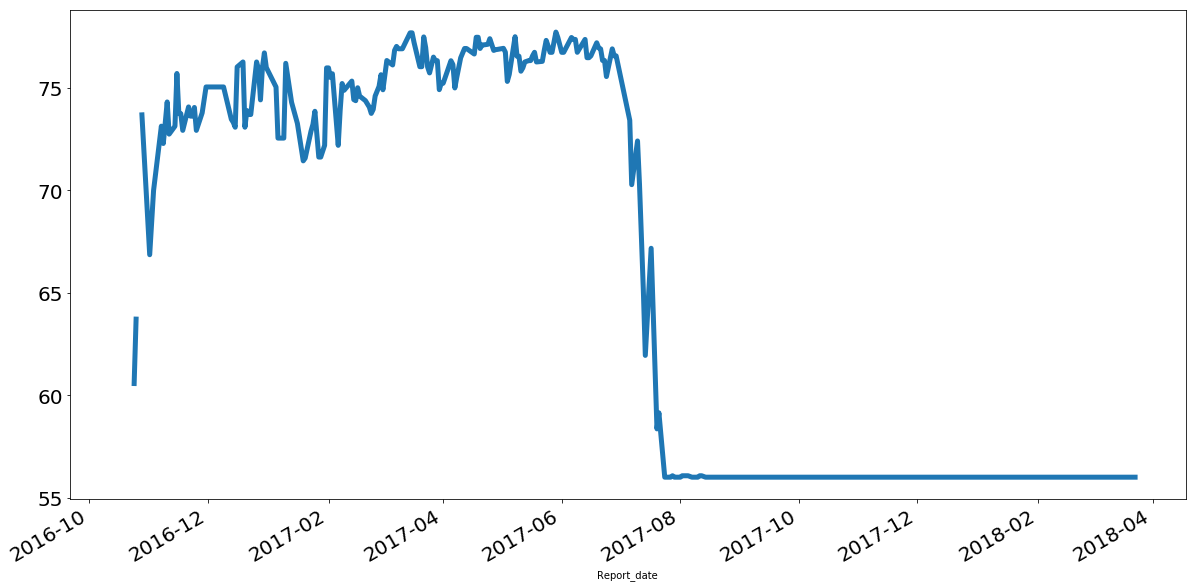

In [65]:
sales_df['Price'].rolling(window = 7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)